In [1]:
import jpype
from jpype import JClass, JString, getDefaultJVMPath, shutdownJVM, startJVM, java

In [2]:
from zipfile import *
import zipfile

In [3]:
def read_jar(jar_file):
    zf = zipfile.ZipFile(jar_file, 'r')
    try:
        lst = zf.infolist()
        for zi in lst:
            fn = zi.filename 
    finally:
        zf.close()

In [4]:
read_jar("zemberek-full.jar")

In [5]:
jar = r"C:/Users/Dilemre/Documents/GitHub/bitirme/zemberek-full.jar"
jvmpath = r"C:/Program Files/Java/jdk-17.0.2/bin/server/jvm.dll"
if not jpype.isJVMStarted():
    jpype.startJVM(jvmpath=jvmpath, classpath=jar)
    print("ok")

ok


In [6]:
try:
    TurkishTokenizer = JClass('zemberek.tokenization.TurkishTokenizer')
    Token = JClass('zemberek.tokenization.Token')
    TurkishMorphology = JClass('zemberek.morphology.TurkishMorphology')
    TurkishSpellChecker = JClass('zemberek.normalization.TurkishSpellChecker')
    WordAnalysis =  JClass('zemberek.morphology.analysis.WordAnalysis')
    TurkishSentenceExtractor = JClass('zemberek.tokenization.TurkishSentenceExtractor')
except:
    print("wrong path")

In [7]:
morphology = TurkishMorphology.createWithDefaults()
tokenizer = TurkishTokenizer.ALL
spell_checker = TurkishSpellChecker(morphology)
extractor = TurkishSentenceExtractor.DEFAULT

In [8]:
import pandas as pd
import numpy as np
import string

In [9]:
data = pd.read_csv("ndata.csv")

In [10]:
data

,info,title,caption,link,text
0,"19 Mart 2021, Cuma",MEHMET BARLAS,Türk siyasetinde Devlet Bahçeli bir tutarlılık...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nDün MHP'nin Büyük Kurultay'ında Genel Başk...
1,"18 Mart 2021, Perşembe",MEHMET BARLAS,Amerikan iç politikasında kimin kimi hedef ala...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nAmerikan iç politikasındaki gelişmeler kes...
2,"17 Mart 2021, Çarşamba",MEHMET BARLAS,"Amerikalılar, yalancı Amerikan başkanlarını ar...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nBugüne kadar her konuda Yunanistan'ın ve K...
3,"16 Mart 2021, Salı",MEHMET BARLAS,Darbeler geçmişte Türkiye’nin dış politikasını...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,"\n\nMısır'la diplomatik ilişkilerin başlaması,..."
4,"15 Mart 2021, Pazartesi",MEHMET BARLAS,"Müflis Yunanistan, Türkiye’ye gövde gösterisi ...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nTabii ki hiçbir ülkeyi küçük görmemek gere...
...,...,...,...,...,...
2410,"18 Şubat 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Takım ruhu lider yapar,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nAntalya'nın her alanda kurtuluşu takım ruh...
2411,"11 Şubat 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Önemli gün,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nBugün Antalya için çok önemli bir gün.\r\n...
2412,"28 Ocak 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Haydi maça,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nAntalya'da spor ve kardeşlik adına önemli ...
2413,"21 Ocak 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Laf-ı güzaf,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nDün bizim gazetenin manşet haberi Antalya ...


In [63]:
data.groupby("title").size()

title
ABDULLAH ERBOĞA      20
AHMET BAYKAL          3
AHMET UYSAL           1
AHMET ÇAKAR          20
AHMET ÖRS            17
                     ..
İSMAİL ÇAĞLAR        18
ŞELALE KADAK         19
ŞENGÜL BALIKSIRTI    19
ŞEREF OĞUZ           19
ŞERİF DİLEK           6
Length: 204, dtype: int64

In [11]:
def dataCleaning(text):
    text = text.replace("\n", " ")
    text = text.lower()
    text = "".join([i for i in text if (i.isalnum() or i == " ")])
    return " ".join(text.split())


def removeStopwords(text):
    stopwords = [x.strip() for x in open('stop-words.txt','r', encoding="UTF8").read().split('\n')]
    for word in text:
        if word in stopwords or word in string.whitespace:
            text.remove(word)
    return text


def wordTokenize(text):
    text = text.split(" ")
    text = removeStopwords(text)
    return text


def sentTokenize(text):
    sent_list = []
    text = text.replace("\"", "")
    results: TurkishSentenceExtractor = extractor.fromDocument(jpype.JString(text))
    for result in results:
        result = dataCleaning(str(result))
        result = removeStopwords(result.split(" "))
        if len(result) == 0:
            continue
        else:
            sent_list.append(" ".join(result))         
    return sent_list


def lemmas(sent_list):
    lemma = []
    for sent in sent_list:
        results: WordAnalysis = morphology.analyzeAndDisambiguate(jpype.JString(sent)).bestAnalysis()
        for result in results:
            if str(result.getLemmas()[0]) == "UNK":
                lemma.append(sent)
            else:
                lemma.append(str(result.getLemmas()[0]))
    return lemma


def wtLenDist(wt):
    wt_len = [len(word) for word in wt]
    wt_len_dist = dict()
    wt_len_dist.fromkeys(set(wt_len))
    for i in set(wt_len):
        wt_len_dist[i] = wt_len.count(i)
    return wt_len_dist


def stLenDist(st):
    st_len = [len(wordTokenize(sent)) for sent in st]
    st_len_dist = dict()
    st_len_dist.fromkeys(set(st_len))
    for i in set(st_len):
        st_len_dist[i] = st_len.count(i)
    return st_len_dist

In [12]:
data['clean_text'] = data['text'].apply(lambda x : dataCleaning(x))

In [13]:
data['word_token'] = data['clean_text'].apply(lambda x : wordTokenize(x))

In [14]:
data['sent_token'] = data['text'].apply(lambda x : sentTokenize(x))

In [15]:
data['lemmas'] = data['sent_token'].apply(lambda x : lemmas(x))

In [16]:
data['wtLenDist'] = data['lemmas'].apply(lambda x : wtLenDist(x))

In [95]:
data['target'] = pd.factorize(data.title)[0]

In [96]:
data

,info,title,caption,link,text,clean_text,word_token,sent_token,lemmas,wtLenDist,label,target
0,"19 Mart 2021, Cuma",MEHMET BARLAS,Türk siyasetinde Devlet Bahçeli bir tutarlılık...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nDün MHP'nin Büyük Kurultay'ında Genel Başk...,dün mhpnin büyük kurultayında genel başkan dev...,"[mhpnin, büyük, kurultayında, genel, başkan, d...",[mhpnin büyük kurultayında genel başkan devlet...,"[mhp, büyük, kurultay, genel, başkan, devlet, ...","{2: 18, 3: 36, 4: 17, 5: 63, 6: 25, 7: 16, 8: ...",0,0
1,"18 Mart 2021, Perşembe",MEHMET BARLAS,Amerikan iç politikasında kimin kimi hedef ala...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nAmerikan iç politikasındaki gelişmeler kes...,amerikan iç politikasındaki gelişmeler kesinli...,"[amerikan, iç, politikasındaki, gelişmeler, bi...",[amerikan iç politikasındaki gelişmeler bizimk...,"[amerikan, iç, politika, geliş, biz, ilgi, çek...","{1: 4, 2: 24, 3: 55, 4: 32, 5: 92, 6: 32, 7: 2...",0,0
2,"17 Mart 2021, Çarşamba",MEHMET BARLAS,"Amerikalılar, yalancı Amerikan başkanlarını ar...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nBugüne kadar her konuda Yunanistan'ın ve K...,bugüne kadar her konuda yunanistanın ve kıbrıs...,"[bugüne, konuda, yunanistanın, kıbrıs, rumları...",[bugüne her konuda yunanistanın kıbrıs rumları...,"[bugün, her, konu, yunanistan, kıbrıs, rum, ol...","{97: 1, 2: 18, 3: 30, 4: 23, 5: 45, 6: 27, 7: ...",0,0
3,"16 Mart 2021, Salı",MEHMET BARLAS,Darbeler geçmişte Türkiye’nin dış politikasını...,https://www.sabah.com.tr/yazarlar/barlas/2021/...,"\n\nMısır'la diplomatik ilişkilerin başlaması,...",mısırla diplomatik ilişkilerin başlaması ülkel...,"[mısırla, diplomatik, ilişkilerin, başlaması, ...",[mısırla diplomatik ilişkilerin başlaması ülke...,"[mısır, diplomatik, ilişki, başla, ülke, dış, ...","{2: 17, 3: 23, 4: 24, 5: 61, 6: 29, 7: 27, 8: ...",0,0
4,"15 Mart 2021, Pazartesi",MEHMET BARLAS,"Müflis Yunanistan, Türkiye’ye gövde gösterisi ...",https://www.sabah.com.tr/yazarlar/barlas/2021/...,\n\nTabii ki hiçbir ülkeyi küçük görmemek gere...,tabii ki hiçbir ülkeyi küçük görmemek gerekiyo...,"[tabii, hiçbir, ülkeyi, küçük, görmemek, gerek...","[tabii hiçbir ülkeyi küçük görmemek gerekiyor,...","[tabii, hiçbir, ülke, küçük, gör, gerek, bazı,...","{1: 7, 2: 25, 3: 33, 4: 47, 5: 57, 6: 22, 7: 2...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2410,"18 Şubat 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Takım ruhu lider yapar,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nAntalya'nın her alanda kurtuluşu takım ruh...,antalyanın her alanda kurtuluşu takım ruhuna b...,"[antalyanın, alanda, kurtuluşu, takım, ruhuna,...",[antalyanın alanda kurtuluşu takım ruhuna bağl...,"[antalya, alan, kurtul, takım, ruh, bağ, bu, z...","{2: 19, 3: 51, 4: 39, 5: 69, 6: 27, 7: 23, 8: ...",203,203
2411,"11 Şubat 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Önemli gün,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nBugün Antalya için çok önemli bir gün.\r\n...,bugün antalya için çok önemli bir gün zira baş...,"[antalya, önemli, gün, başbakan, binali, yıldı...","[antalya çok önemli gün, başbakan binali yıldı...","[antalya, çok, önem, gün, başbakan, binali, yı...","{1: 1, 2: 39, 3: 36, 4: 34, 5: 58, 6: 27, 7: 2...",203,203
2412,"28 Ocak 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Haydi maça,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nAntalya'da spor ve kardeşlik adına önemli ...,antalyada spor ve kardeşlik adına önemli bir g...,"[antalyada, spor, kardeşlik, önemli, gün, yaşa...",[antalyada spor kardeşlik önemli gün yaşanacak...,"[antalya, spor, kardeş, önem, gün, yaşa, akden...","{1: 2, 2: 25, 3: 60, 4: 45, 5: 55, 6: 28, 7: 1...",203,203
2413,"21 Ocak 2017, Cumartesi",ÖMER DURNA (AKDENİZ),Laf-ı güzaf,https://www.sabah.com.tr/yazarlar/bolgeler/ome...,\n\nDün bizim gazetenin manşet haberi Antalya ...,dün bizim gazetenin manşet haberi antalya kent...,"[bizim, gazetenin, manşet, haberi, antalya, ke...",[bizim gazetenin manşet haberi antal

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

model = SVC(random_state = 42)

In [191]:
x = np.array(data.lemmas)
for i in range(0, len(data.lemmas)):
    x[i] = " ".join(data.lemmas[i])

In [192]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer()
sparce_matrix = count_vectorize.fit_transform(x).toarray()

In [195]:
tfidf_vector = TfidfVectorizer(ngram_range=(3,5))
tfidf_matrix = Tfidf_Vector.fit_transform(x).toarray()

In [ ]:
#terms = tfidf_vector.get_feature_names_out()
#Tfidf_df = pd.DataFrame(np.round(tfidf_matrix,3), columns=terms)

In [197]:
attribution = [tfidf_matrix, sparce_matrix]
for item in attribution:
    y = data.iloc[:,-1]
    x = item

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state = 42)

In [198]:
import time
start = time.time() 

svm_classifier = SVC()
svm_classifier.fit(x_train,y_train)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

Support Vector Machine Classifier has fitted, this process took 338.66 seconds


In [199]:
y_pred = svm_classifier.predict(x_test)
ACC = metrics.accuracy_score(y_test,y_pred)    
print("Accuracy = %"+ str(ACC*100))

Accuracy = %42.14876033057851


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

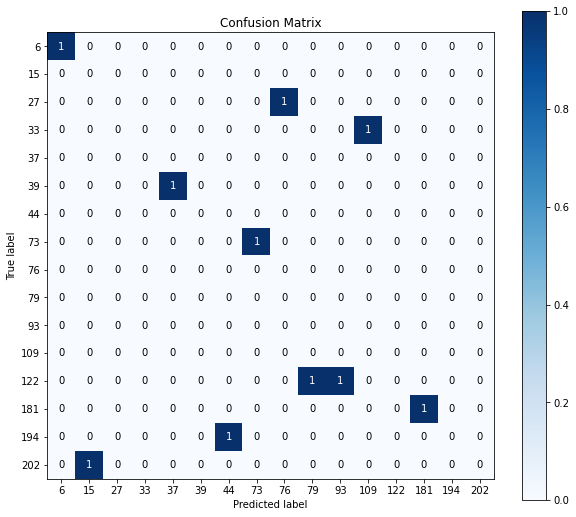

In [200]:
import scikitplot.metrics as splt

splt.plot_confusion_matrix(y_test[10:20], y_pred[10:20],figsize=(10,9))

In [188]:
x

array([[0.02946278, 0.05892557, 0.02946278, ..., 0.08838835, 0.02946278,
        0.02946278],
       [0.02946278, 0.05892557, 0.02946278, ..., 0.08838835, 0.02946278,
        0.02946278],
       [0.02946278, 0.05892557, 0.02946278, ..., 0.08838835, 0.02946278,
        0.02946278],
       ...,
       [0.02946278, 0.05892557, 0.02946278, ..., 0.08838835, 0.02946278,
        0.02946278],
       [0.02946278, 0.05892557, 0.02946278, ..., 0.08838835, 0.02946278,
        0.02946278],
       [0.02946278, 0.05892557, 0.02946278, ..., 0.08838835, 0.02946278,
        0.02946278]])